In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from functions import *


In [2]:
diplotype_df = pd.read_parquet('/home/jupyter-yusuf/Consensus/output/3_diplotypes.parquet')

/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


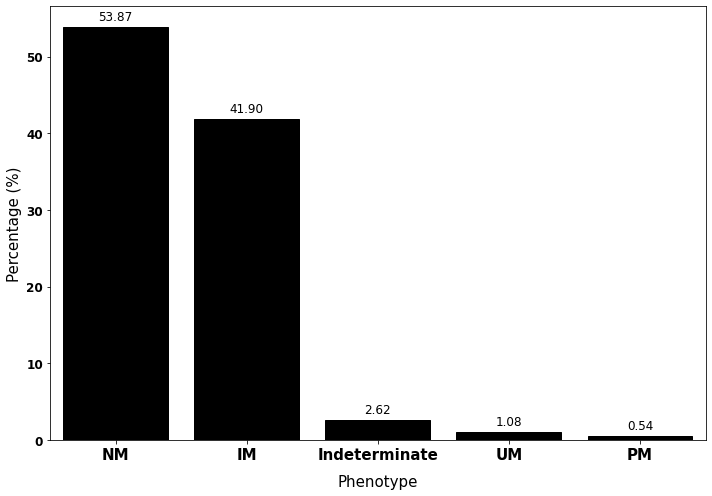

In [3]:
barplot_frequency(diplotype_df.groupby('phenotype')['AF'].sum().reset_index().sort_values(by='AF', ascending=False),
                  x_col='phenotype', y_col='AF', 
                  xlabel='Phenotype', ylabel='Percentage (%)', 
                  title=None, 
                  figsize=(10, 7), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette=None, color = 'black',
                  grid=False, ci=None)


In [4]:
NM= 53.87
IM= 41.90
Indeterminate= 2.62
UM= 1.08
PM= 0.54

print(IM + UM + PM + Indeterminate)

46.13999999999999


In [18]:
data = pd.melt(diplotype_df, id_vars=['diplotype', 'phenotype'], value_vars=['AF_GA_C', 'AF_GA_I', 'AF_GA_M'], var_name='genetic_ancestry', value_name='percentage')
data = data.replace({'AF_GA_C': 'Chinese', 'AF_GA_I': 'Indian', 'AF_GA_M': 'Malay'})


/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


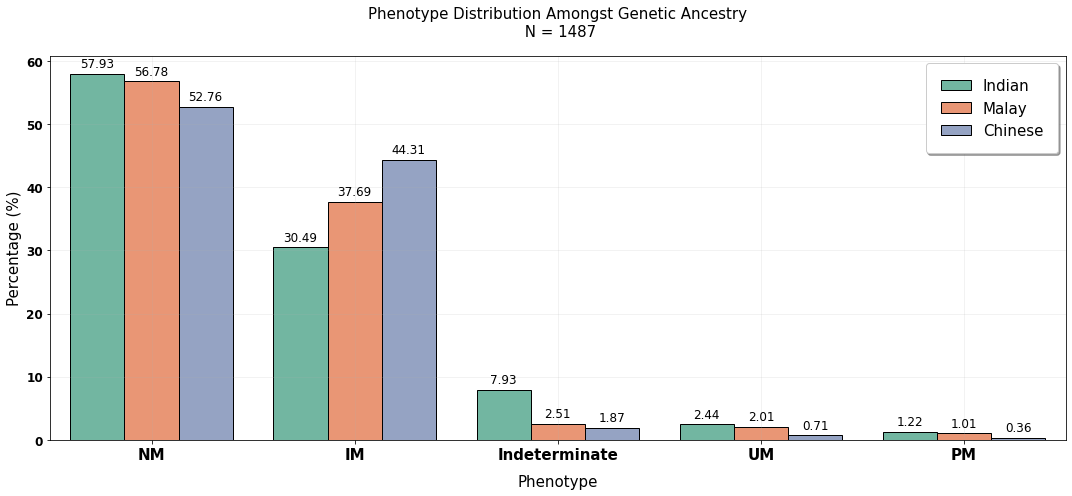

In [6]:
barplot_frequency(data.groupby(['phenotype', 'genetic_ancestry'])['percentage'].sum().reset_index().sort_values(by='percentage', ascending=False),
                  x_col='phenotype', y_col='percentage', 
                  xlabel='Phenotype', ylabel='Percentage (%)', 
                  title=f'Phenotype Distribution Amongst Genetic Ancestry\n N = {int(diplotype_df["AC"].sum())}', 
                  figsize=(15, 7), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette='Set2',
                  grid=True, ci=None, hue = 'genetic_ancestry', legend='Genetic Ancestry'  )

## Change the color theme

In [19]:
def calculate_sample(ga):
	if ga == 'Chinese':
		return f'Chinese (N={int(diplotype_df["AC_C"].sum())})'
	elif ga == 'Indian':
		return f'Indian (N={int(diplotype_df["AC_I"].sum())})'
	else:
		return f'Malay (N={int(diplotype_df["AC_M"].sum())})'

In [21]:
data['genetic_ancestry'] = data['genetic_ancestry'].apply(calculate_sample)


In [23]:
ancestry_color_map = {
    f'Chinese (N={int(diplotype_df["AC_C"].sum())})': '#8f001D',  
    f'Malay (N={int(diplotype_df["AC_M"].sum())})': '#107b01',    
    f'Indian (N={int(diplotype_df["AC_I"].sum())})': '#7e00ff'    
}

In [24]:
order_list = [f'Chinese (N={int(diplotype_df["AC_C"].sum())})', f'Malay (N={int(diplotype_df["AC_M"].sum())})', f'Indian (N={int(diplotype_df["AC_I"].sum())})']


data['genetic_ancestry'] = pd.Categorical(data['genetic_ancestry'], categories=order_list, ordered=True)


/home/jupyter-yusuf/Consensus/data_viz/functions.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart = sns.barplot(x=x_col, y=y_col, data=data, color=color, ci=ci, hue=hue, palette=palette, edgecolor='black')


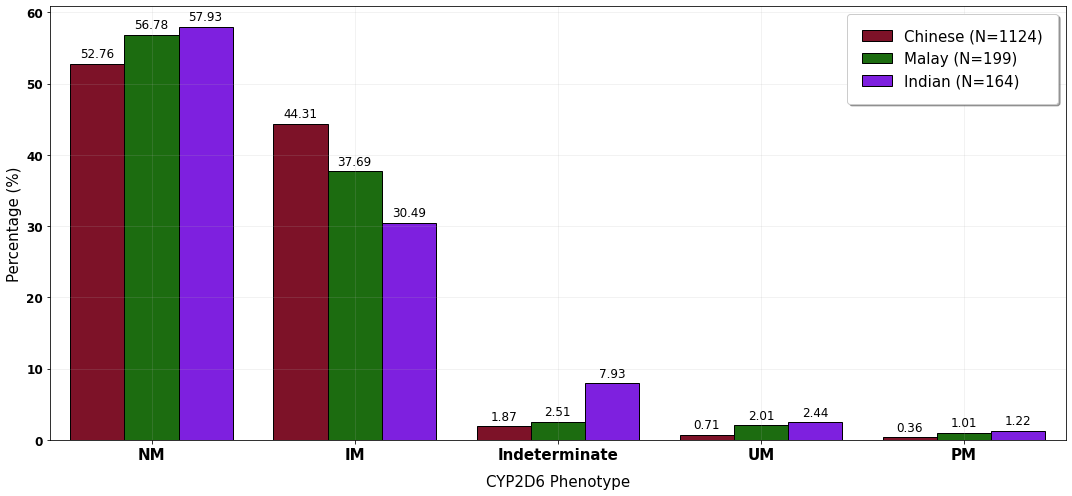

In [25]:
barplot_frequency(data.groupby(['phenotype', 'genetic_ancestry'])['percentage'].sum().reset_index().sort_values(by=['percentage','genetic_ancestry'], ascending=False),
                  x_col='phenotype', y_col='percentage', 
                  xlabel='CYP2D6 Phenotype', ylabel='Percentage (%)', title=None,
                  figsize=(15, 7), fontsize=12, label_fontsize=15, title_fontsize=15,
                  x_ticks_rotation=False, palette=ancestry_color_map,
                  grid=True, ci=None, hue = 'genetic_ancestry', legend='Genetic Ancestry' )


In [15]:
data.query('phenotype == "PM" & percentage > 0')


,diplotype,phenotype,genetic_ancestry,percentage
38,*5/*5,PM,Chinese (n=2276),0.175747
55,*5/*21,PM,Chinese (n=2276),0.175747
131,*5/*5,PM,Indian (n=400),0.606061
177,*5/*7,PM,Indian (n=400),0.606061
244,*4/*5,PM,Malay (n=330),0.500000
249,*5/*15,PM,Malay (n=330),0.500000
